# Line

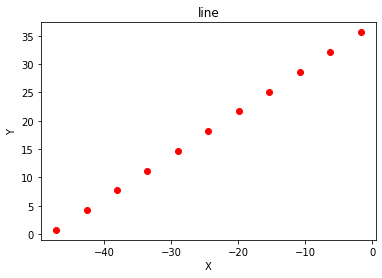

In [1]:
from matplotlib import pyplot as plt
from math import cos, sin

def line(x, y, theta, l):
    """
    Args:
        x: start x coord
        y: start y coord
        theta: hdg
        l: distance(length)
    
    Return:
        nx: next x value
        ny: next y value
    """
    dx = l * cos(theta)
    dy = l * sin(theta)

    nx = x + dx
    ny = y + dy

    return nx, ny
    
x = -4.7170752711170401e+01
y = 7.2847983820912710e-01
hdg = 6.5477882613167993e-01
length = 5.7280000000000000e+01

sample_rate = 10
x_li, y_li = [], []
for i in range(sample_rate+1):
    l = (length*i)/sample_rate
    nx, ny = line(x, y, hdg, l)
    x_li.append(nx), y_li.append(ny)
    
plt.plot(x_li, y_li, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('line')
plt.show()

# Param Cubic

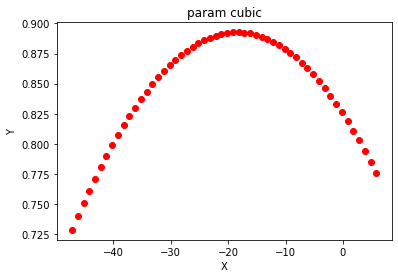

In [19]:
from matplotlib import pyplot as plt
from math import pow, cos, sin, hypot
import numpy as np


class Curve:
    def __init__(self, x0: float, y0: float, hdg: float):
        self.trans = np.array((x0, y0))
        self.hdg = hdg
        self.R = np.array(((np.cos(hdg), -np.sin(hdg)),
                           (np.sin(hdg),  np.cos(hdg))))
    
    def rel_to_abs(self, p):
        """
        Convert relative coordinate to absolute coord
        (use rotation matrix)
        """
        return self.R.dot(np.array(p)) + self.trans 


class CubicEq:
    def __init__(self, a, b, c, d):
        self.a = a
        self.b = b
        self.c = c
        self.d = d

    def cal_cubic(self, p: float) -> float:
        return self.a + self.b*p + self.c*pow(p, 2) + self.d*pow(p, 3)


class ParamCubic:
    def __init__(self, length: float, 
                 au: float, bu: float, cu: float, du: float,
                 av: float, bv: float, cv: float, dv: float):
        self.u_eq = CubicEq(au, bu, cu, du)
        self.v_eq = CubicEq(av, bv, cv, dv)
        self.length = length
    
    def get_points(self):
        interval = 1
        now_length = 0.0
        p = 0.0

        xs = [self.u_eq.cal_cubic(p)]
        ys = [self.v_eq.cal_cubic(p)]
        while True:
            prev_p = (self.u_eq.cal_cubic(p), self.v_eq.cal_cubic(p))
            p += interval
            next_p = (self.u_eq.cal_cubic(p), self.v_eq.cal_cubic(p))
            now_length += hypot(next_p[0] - prev_p[0], next_p[1], prev_p[1])
            
            if now_length > self.length:
                break
            xs.append(next_p[0]), ys.append(next_p[1])

        return xs, ys


x = -4.7170752711170401e+01
y = 7.2847983820912710e-01
hdg = 6.5477882613167993e-01
length = 5.7280000000000000e+01
aU=0.000000000000e+00
bU=1.000000000000e+00
cU=-4.666602734948e-09
dU=-2.629787927644e-08
aV=0.000000000000e+00
bV=1.665334536938e-16
cV=-1.987729787588e-04
dV=-1.317158625579e-09
U = [aU, bU, cU, dU]
V = [aV, bV, cV, dV]

paramcub = ParamCubic(length, aU, bU, cU, dU, aV, bV, cV, dV)
xs, ys = paramcub.get_points()

c = Curve(x, y, np.radians(hdg))
x_li, y_li = [], []
for p in zip(xs, ys):
    xi, yi = c.rel_to_abs(p)
    x_li.append(xi), y_li.append(yi)

plt.plot(x_li, y_li, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('param cubic')
plt.show()